In [104]:
# Import tools that we will need:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import os
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [105]:
 # Set working directory
 os.chdir("/content")

#**Preliminary Cleaning**

In [107]:
data=pd.read_csv('dataHealthAgeingOrg.csv')
data.head(2)

,Time,Time Code,Country Name,Country Code,"Age dependency ratio, old (% of working-age population) [SP.POP.DPND.OL]","Domestic general government health expenditure per capita, PPP (current international $) [SH.XPD.GHED.PP.CD]"
0,2018,YR2018,Afghanistan,AFG,4.75827277828347,9.64153671
1,2018,YR2018,Albania,ALB,20.0412141646094,376.50137329


In [113]:
data.columns = ['year','yearcode','country','countrycode','Dependency','HealthExpPC']

In [114]:
data['HealthExpPC'] = pd.to_numeric(data['HealthExpPC'],errors='coerce')
data['Dependency'] = pd.to_numeric(data['Dependency'],errors='coerce')

In [121]:
midData = data.drop(columns=['year','yearcode','country','countrycode'])
actData = midData.dropna()

#**Plotting Dataset and Line**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


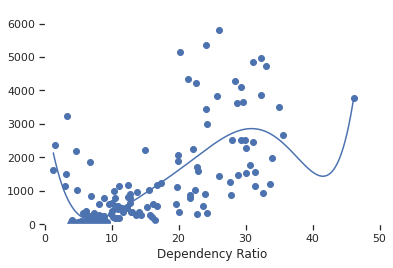

In [122]:
y = actData['HealthExpPC']
x = actData['Dependency']

poly_model = make_pipeline(PolynomialFeatures(6),
                           LinearRegression())
poly_model.fit(x[:, np.newaxis], y)
xfit = np.linspace(min(x), max(x), 1000)
yfit = poly_model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit);
plt.ylabel('')
plt.xlabel('Dependency Ratio')
plt.xlim([0,50])
plt.ylim([0,6500])
ax = plt.subplot(111)
ax.set_facecolor('white')
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()    


#**Plotting Dataset and Line without Outlier**

In [123]:
midDataII = midData.drop(midData[midData.Dependency > 40].index) # dropping the single outlier from the dataset
actDataII = midDataII.dropna()

In [124]:
actDataII

,Dependency,HealthExpPC
0,4.758273,9.641537
1,20.041214,376.501373
2,10.021442,633.798828
5,4.347987,69.060318
6,12.731972,780.362488
...,...,...
209,6.329535,68.977112
210,11.168577,183.498871
211,10.459717,200.541077
215,3.964335,81.467789


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


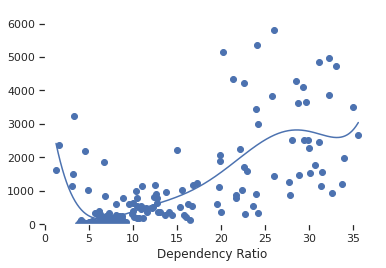

In [125]:
y2 = actDataII['HealthExpPC']
x2 = actDataII['Dependency']

poly_model = make_pipeline(PolynomialFeatures(6), 
                           LinearRegression())
# after polynomial features of 6, the lines are quite similar and based on vegalite the R-squared doesn't increase anymore

poly_model.fit(x2[:, np.newaxis], y2)
xfit2 = np.linspace(min(x2), max(x2), 1000)
yfit2 = poly_model.predict(xfit2[:, np.newaxis])

plt.scatter(x2, y2)
plt.plot(xfit2, yfit2);
plt.ylabel('')
plt.xlabel('Dependency Ratio')
plt.xlim([0,38])
plt.ylim([0,6500])
ax = plt.subplot(111)
ax.set_facecolor('white')
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()  

#**Saving CSV Files**

chart is made in vegalite

In [126]:
 #create new dataframe from the fitted line
fittedLine = pd.DataFrame(data=np.linspace(min(x2), max(x2), 1000), columns = ['xFitted'])

# add new columns for the y values of the fitted line
fittedLine['yFitted'] = yfit2 

In [127]:
fittedLine

,xFitted,yFitted
0,1.286895,2417.043234
1,1.321237,2374.672158
2,1.355579,2332.889949
3,1.389920,2291.690802
4,1.424262,2251.068951
...,...,...
995,35.457067,2982.717197
996,35.491409,2997.087270
997,35.525751,3011.802813
998,35.560093,3026.868479


In [128]:
fittedLine[['xFitted','yFitted']].to_csv("dataHealthAgeingLine.csv")

In [129]:
dataClean = pd.DataFrame(data=actDataII)

In [130]:
dataClean

,Dependency,HealthExpPC
0,4.758273,9.641537
1,20.041214,376.501373
2,10.021442,633.798828
5,4.347987,69.060318
6,12.731972,780.362488
...,...,...
209,6.329535,68.977112
210,11.168577,183.498871
211,10.459717,200.541077
215,3.964335,81.467789


In [131]:
dataClean.to_csv("dataHealthAgeing.csv")